<a href="https://colab.research.google.com/github/Sarath-Haridas/Capstone_Project_4_Netflix_Movies_and_TV_Shows_Clustering/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING**

##### **Project Type**    - Unsupervised Learning
##### **Contribution**    - Team
##### **Team Member 1 -** Sk Samim Ali (Cohort Florence)
##### **Team Member 2 -** Sarath Haridas (Cohort Florence)


# **Project Summary -**

**There are 12 characteristics and 7787 observations in this Netflix Movies and TV Shows dataset. In 2018, the dataset was gathered via flixable, a third-party Netflix search engine. The amount of TV shows available on Netflix has nearly tripled since 2010, according to a recent report. 
Since 2010, the number of movies available on the streaming service has dropped by more than 2000, although the number of TV episodes has nearly tripled. Investigating what further insights may be drawn from the same dataset will be intriguing. After loading the dataset, we first cleaned the data, i.e., we identified some characteristics with a high percentage of null values. Thus, we handled the approximately five features with null values appropriately. As a result, we choose to remove the director characteristic. We also deal with the nation attribute; we eliminated certain NaN values that were discovered in this attribute. 
Then, in order to obtain some understanding, we undertook exploratory data analysis. Different graphs and plots were created. Speaking of insights, we discovered that 69.05% of the data on Netflix is made up of movies, while 30.95% of the data in Netflix is made up of TV shows. We discovered that the United States has the most Netflix material overall, followed by India, which is in second place, with the aid of pie chart visualisation. Data preprocessing was done on texted data (attributes), namely the description attribute and listed in attribute, as the next step.
By eliminating stop words, deleting punctuation, performing stemming, and then applying counter vectorizer on the updated text features, we come up with a number of strategies to reduce the count, or perhaps we should say length, of the text values in these two characteristics. And we obtained an incredibly remarkable result—the length of the text data for each attribute was reduced. The last part of the project is now complete. Here, we used clustering techniques to choose the best cluster using the Silhouette Score approach, and we obtained a score of 0.348 for each of the three clusters. K=3 was the outcome of our application of the elbow approach for K Means Clustering. K mean clustering, Hierarchical clustering (Dendrogram), and Agglomerative were also utilised. And from this, we deduced that the dataset's optimal K cluster is 3. Following that, we tested our project by going through the recommendation phase, and the results were pleasing.**

# **GitHub Link -**

[https://github.com/Sarath-Haridas/Capstone_Project_4_Netflix_Movies_and_TV_Shows_Clustering](https://github.com/Sarath-Haridas/Capstone_Project_4_Netflix_Movies_and_TV_Shows_Clustering)

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

# ***Let's Begin !***

#**Importing libraries**

In [1]:
#importing the required modules
import pandas as pd
import numpy as np
import sklearn
import pylab
import spacy
import en_core_web_sm
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

#importing module for name entity recognization (NER)
from nltk import ne_chunk

#module for tokenizing
from nltk import word_tokenize, sent_tokenize

#module for steming
from nltk.stem import PorterStemmer, LancasterStemmer
from nltk.stem.snowball import SnowballStemmer


#vectorizer for creating a document term matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD

#module for stopwords
from nltk.corpus import stopwords
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import PCA
from wordcloud import wordcloud

#importing libraries for clustereing
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics import silhouette_samples, silhouette_score


from scipy.cluster.hierarchy import linkage
from sklearn.datasets import make_blobs
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler 

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [2]:
# installing a package called 'neattext' for cleaning textual data and text preprocessing.
!pip install neattext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 114 kB 5.1 MB/s 


In [3]:
# importing neattext's functions
import neattext.functions as nfx

#**Mount the Drive and import the dataset**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [75]:
netflix = pd.read_csv("/content/drive/MyDrive/Capstone_Project_4_netflix_Movies_and_TV_Shows_Clustering/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

#**Let's Explore and Understand about the data** 

In [6]:
#checking the top first 5 rows of the data
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [7]:
#Checking last 5 rows(tail) of Data
netflix.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [8]:
#checking the rows of dataset with rows and columns
print(f' The shape of dataset is {(netflix.shape)} \n Total Rows are : {(netflix.shape)[0]}\n Total Columns are : {(netflix.shape)[1]}')

 The shape of dataset is (7787, 12) 
 Total Rows are : 7787
 Total Columns are : 12


In [9]:
#check the details about the data
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [10]:
#check all the duplicates
netflix.duplicated().sum()

0

**Points to be noted:**📝

* The data is supplied in 7787 rows and 12 columns. 
* Director, cast, country, date added, and rating all have null values. 
* Since date added and rating have the fewest null values (10 & 7 respectively), we shall delete them from the data. There are no duplicate values.:

In [11]:
#check all the columns of the dataset
print(f'All the column of the dataset')
netflix.columns

All the column of the dataset


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [12]:
#checking the description of dataset
netflix.describe(include = 'all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


#**Preprocessing the Dataset**

In [13]:
#checking the null/missing values
netflix.isnull().sum()/netflix.shape[0]*100

show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

### **Observation and solution:**
#### 1. **Rating**: According to the information above, 0.0898 percent of the values for this rating characteristic are null. Therefore, we made the decision to replace the null values with the rating column's most common value. It's **TV-MA**, too.

#### 2. **CAST** = There is no need to preserve the Cast property because it contains too many different values and more than 9% of the values are missing, but we are keeping it for exploratory data analysis.

#### 3. **DIRECTOR** = Over 30% of this attribute's values are missing. And because it is not pertinent to this project, we have chosen to fully discontinue this section.

#### 4. **DATE_ADDED** = Approximately 0.13 percent of the date data are missing, thus we opted to remove the null values. #### 4.

#### 5. **COUNTRY** = In this attribute, we decided to do the same thing as we are going to do with the RATING attribute. Replacing null values with the MODE value.

**Dropping the unnecessary columns** 

In [14]:
#treating all the null values according to the solution above mentioned 
netflix['rating'].replace(np.nan, 'TV-MA', inplace=True) #replacing nan values with TV-MA
netflix['cast'].replace(np.nan, 'missing_info', inplace=True) #replacing nan values with missing_info
netflix.drop(['director', 'duration', 'show_id'], axis=1, inplace=True) #droping the columns which are not useful

In [15]:
netflix['country'].fillna(netflix['country'].mode()[0], inplace=True)

In [16]:
netflix.head()

,type,title,cast,country,date_added,release_year,rating,listed_in,description
0,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,Dramas,A brilliant group of students become card-coun...


In [17]:
#checking the count of the value of type attribute
netflix['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

In [18]:
#lets change all the character of title into lower
netflix['title'].str.lower()

0                                            3%
1                                          7:19
2                                         23:59
3                                             9
4                                            21
                         ...                   
7782                                       zozo
7783                                     zubaan
7784                          zulu man in japan
7785                      zumbo's just desserts
7786    zz top: that little ol' band from texas
Name: title, Length: 7787, dtype: object

In [19]:
#creating a year added feature for demonstrating the releasing years 
netflix["date_added"] = pd.to_datetime(netflix['date_added'])
netflix['year_added'] = netflix['date_added'].dt.year

In [20]:
# if any values in the title attribute contains special characters then removing them with the help of neattext functions = remove_special_characters.
netflix['title'] = netflix['title'].str.lower().apply(lambda x : nfx.remove_special_characters(x))

In [21]:
# if any values in the title attribute contains stop words then removing them with the help of neattext functions = remove_stopwords
netflix['title'] = netflix['title'].str.lower().apply(lambda x : nfx.remove_stopwords(x))

In [22]:
#creating a cast column again by splitting the values with the comma
netflix['cast_name'] = netflix['cast'].apply(lambda x : x.split(','))

In [23]:
# to check whether the special characters and stop words were removed or not.
netflix['title'].unique

<bound method Series.unique of 0                             3
1                           719
2                          2359
3                             9
4                            21
                 ...           
7782                       zozo
7783                     zubaan
7784             zulu man japan
7785            zumbos desserts
7786    zz little ol band texas
Name: title, Length: 7787, dtype: object>

In [24]:
#checking the attributes that still if there are any null values in each attribute
netflix.isnull().sum()

type             0
title            0
cast             0
country          0
date_added      10
release_year     0
rating           0
listed_in        0
description      0
year_added      10
cast_name        0
dtype: int64

### **Spitting the values of the TYPE content into MOVIES and TV Shows**

In [25]:
#Movie content data 
netflix_movies = netflix[netflix['type']=='Movie'].copy()
netflix_movies.head()


,type,title,cast,country,date_added,release_year,rating,listed_in,description,year_added,cast_name
1,Movie,719,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,"[Demián Bichir, Héctor Bonilla, Oscar Serran..."
2,Movie,2359,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0,"[Tedd Chan, Stella Chung, Henley Hii, Lawre..."
3,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0,"[Elijah Wood, John C. Reilly, Jennifer Conne..."
4,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,Dramas,A brilliant group of students become card-coun...,2020.0,"[Jim Sturgess, Kevin Spacey, Kate Bosworth, ..."
6,Movie,122,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020-06-01,2019,TV-MA,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",2020.0,"[Amina Khalil, Ahmed Dawood, Tarek Lotfy, A..."


In [26]:
#TV content data
netflix_tv = netflix[netflix['type']=='TV Show'].copy()
netflix_tv.head()

,type,title,cast,country,date_added,release_year,rating,listed_in,description,year_added,cast_name
0,TV Show,3,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,"[João Miguel, Bianca Comparato, Michel Gomes..."
5,TV Show,46,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,TV-MA,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017.0,"[Erdal Beşikçioğlu, Yasemin Allen, Melis Bir..."
11,TV Show,1983,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States",2018-11-30,2018,TV-MA,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law...",2018.0,"[Robert Więckiewicz, Maciej Musiał, Michalin..."
12,TV Show,1994,missing_info,Mexico,2019-05-17,2019,TV-MA,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...,2019.0,[missing_info]
16,TV Show,feb09,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",United States,2019-03-20,2018,TV-14,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h...",2019.0,"[Shahd El Yaseen, Shaila Sabt, Hala, Hanadi..."


# **EXPLORATORY DATA ANALYSIS**

### **Percentage distribution of content among all the countries**

In [27]:
country = netflix['country'].value_counts().reset_index()
country = country[country['country'] /  country['country'].sum() > 0.01]

fig = px.pie(country, values='country', names='index',color_discrete_sequence=px.colors.sequential.Plasma_r)
fig.update_traces(textposition='inside', textinfo='percent+label',
                  marker = dict(line = dict(color = 'darkred', width = 2)))
fig.show()

### Observation:
#### **According to this pie chart, the United States accounts for 53.9% of the creators of Netflix movies and shows, with India coming in at roughly 16.3%.**

###**Values count of Movies & TV Shows in the dataset**

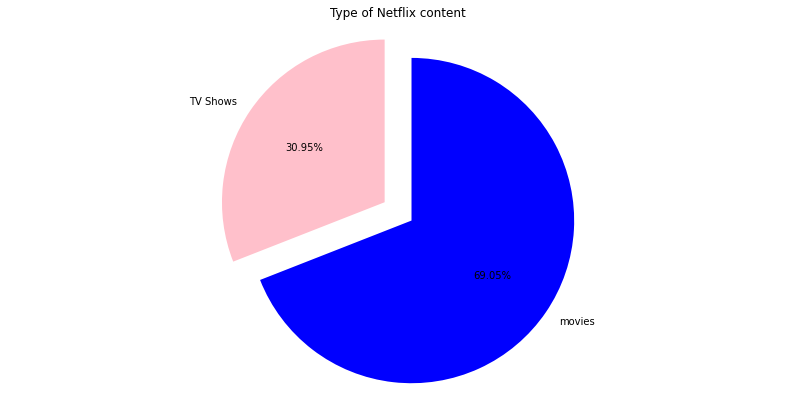

In [28]:
# Plotting a piechart which tells the values count of type content(Movies and TV Shows) in the dataset.
plt.figure(figsize = (14,7))
labels = ['TV Shows', 'movies']
plt.pie(netflix['type'].value_counts().sort_values(), labels=labels, explode=[0.1,0.1],
        autopct = '%1.2f%%', colors = ['pink','blue'], startangle=90)
plt.title('Type of Netflix content')
plt.axis('equal')
plt.show()

###**Observation:**
####**1. The percentage of distribution of Movies Content is 69.05%**
####**2. The percentage distribution of TV Shows Content is 30.95%**

In [29]:
# Checking the unique values of the rating attribute
netflix['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

###**RATING AND THEIR MEANINGS**

####TV-MA: Mature Audience Only

####R: Restricted

####PG-13: Parents Strongly Cautioned

####TV-14: Parents Strongly Cautioned

####TV-PG: Parental Guidance Suggested

####NR :Not Rated

####TV-G: General Audience

####TV-Y: Programs aimed at a very young audience

####TV-Y7: Directed to Older Children

####PG: Parental Guidance Suggested

####G: General Audiences

####NC-17: Clearly Adult

####TV-Y7 FV: Directed to Older Children - Fantasy Violence

####UR: Unrated

In [30]:
# Creating new column where we are giving appropriate names according to the suitable age to each official ratings
rating_names = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Young Adults',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
# adding a new column in the dataset which is replacing the original rating values with age_rating_names
netflix['age_rating'] = netflix['rating'].replace(rating_names)

#checking the unique values of age_rating attribute
netflix['age_rating'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids'],
      dtype=object)

###**Total count of the TYPE content wrt unique age_rating values**

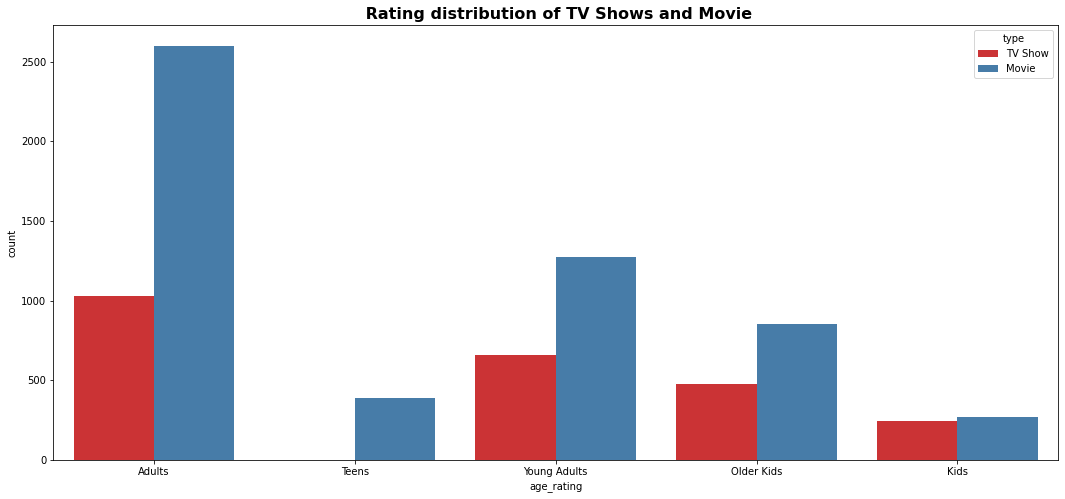

In [31]:
#creating a bar chart which tells the number of MOVIES and TV shows content wrt to unique age_rating values
plt.figure(figsize=(18,8))
sns.countplot(x='age_rating',hue='type', data=netflix, palette="Set1")
plt.title(' Rating distribution of TV Shows and Movie',size='16',fontweight="bold")
plt.show()

###Observation:

####It clearly tells that the count of Adult movies is high which is more than 2500.
####There are no teen shows in Netflix, only teen movies.

### **TOP  Ratings wrt TV Shows count separately**

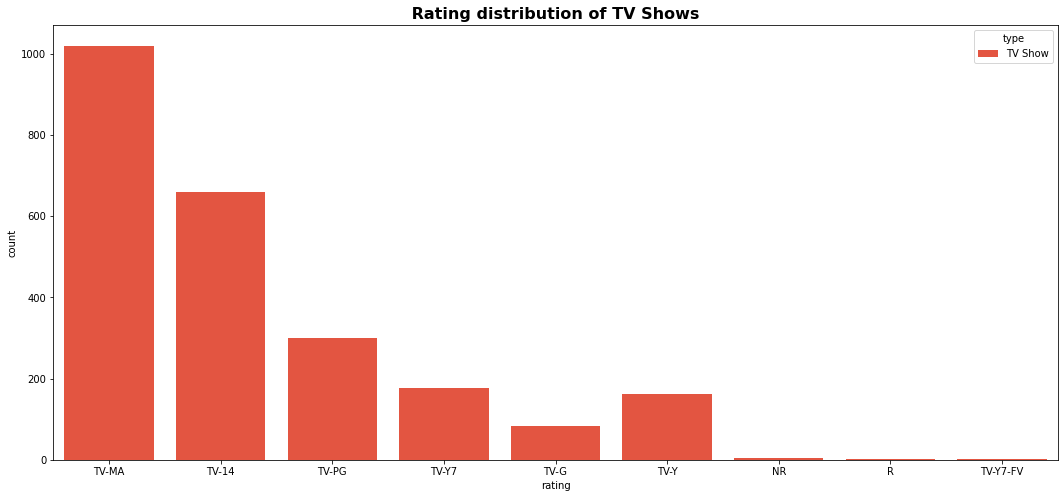

In [32]:
# creating a barchart which tells the count of TV shows content wrt ratings
plt.figure(figsize=(18,8))
sns.countplot(x='rating',hue='type',data=netflix_tv,palette="CMRmap")
plt.title(' Rating distribution of TV Shows ',size='16',fontweight="bold")
plt.show()

In [33]:
# creating a dataframe which shows the count of the TV shows wrt different ratings
TV_shows_rating = netflix_tv.groupby(['rating'])['type'].count().reset_index(name = 'count').sort_values(by = 'count', ascending = False)
TV_shows_rating.style.background_gradient(cmap='Greens')

,rating,count
4,TV-MA,1020
2,TV-14,659
5,TV-PG,301
7,TV-Y7,176
6,TV-Y,163
3,TV-G,83
0,NR,5
1,R,2
8,TV-Y7-FV,1


###Observation:
####**The Adult content of TV programmes is high, as was previously evident from the previous EDA barchart, which showed a large count of Adult-rated content. Mature Audience Only = TV-MA**

###**TOP Ratings wrt Movies count separately**

In [34]:
#Now creating a dataframe which shows the count of the movies wrt different rating
movies_rating = netflix_movies.groupby(['rating'])['type'].count().reset_index(name = 'count').sort_values(by = 'count', ascending = False)
movies_rating.style.background_gradient(cmap='Greens')

,rating,count
8,TV-MA,1850
6,TV-14,1272
5,R,663
9,TV-PG,505
4,PG-13,386
3,PG,247
10,TV-Y,117
7,TV-G,111
11,TV-Y7,95
2,NR,79


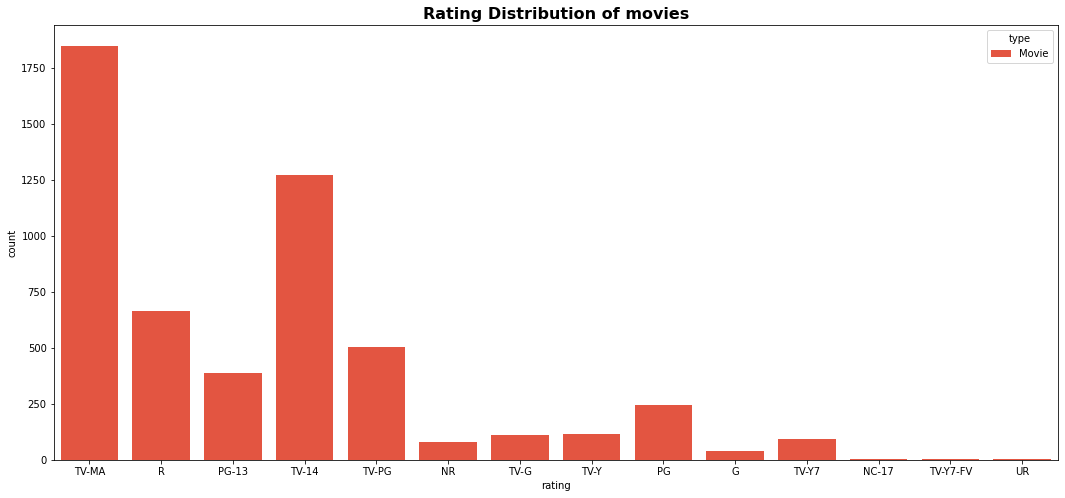

In [35]:
# creating a barchart which tells the count of Movies content wrt ratings
plt.figure(figsize=(18,8))
sns.countplot(x='rating', hue='type',data= netflix_movies, palette='CMRmap')
plt.title('Rating Distribution of movies', size='16', fontweight='bold')
plt.show()

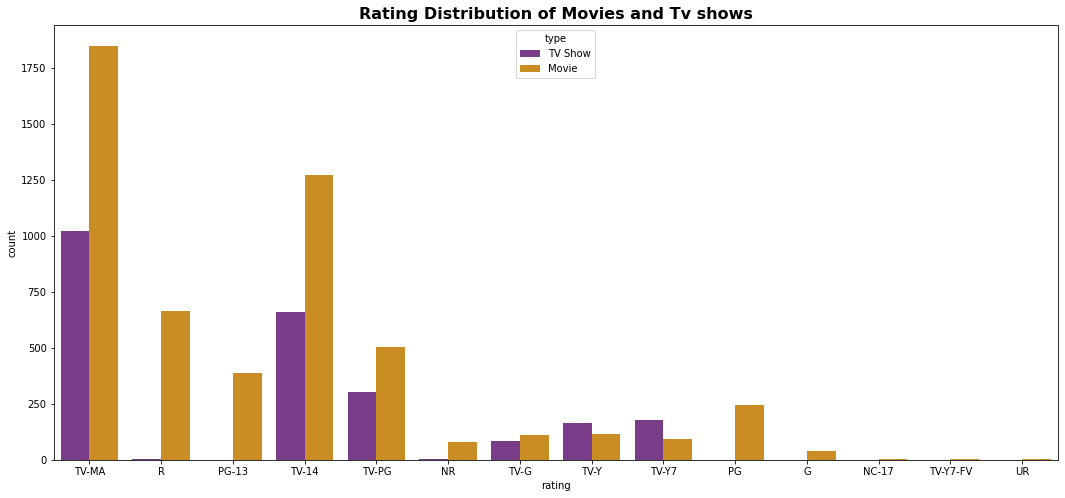

In [36]:
#Creating a barchart which tells the count of Movies and Tv shows content wrt ratings
plt.figure(figsize=(18,8))
sns.countplot(x='rating', hue='type', data=netflix, palette='CMRmap')
plt.title('Rating Distribution of Movies and Tv shows', size='16', fontweight='bold')
plt.show()

### **Top 15 Genres on Netflix**


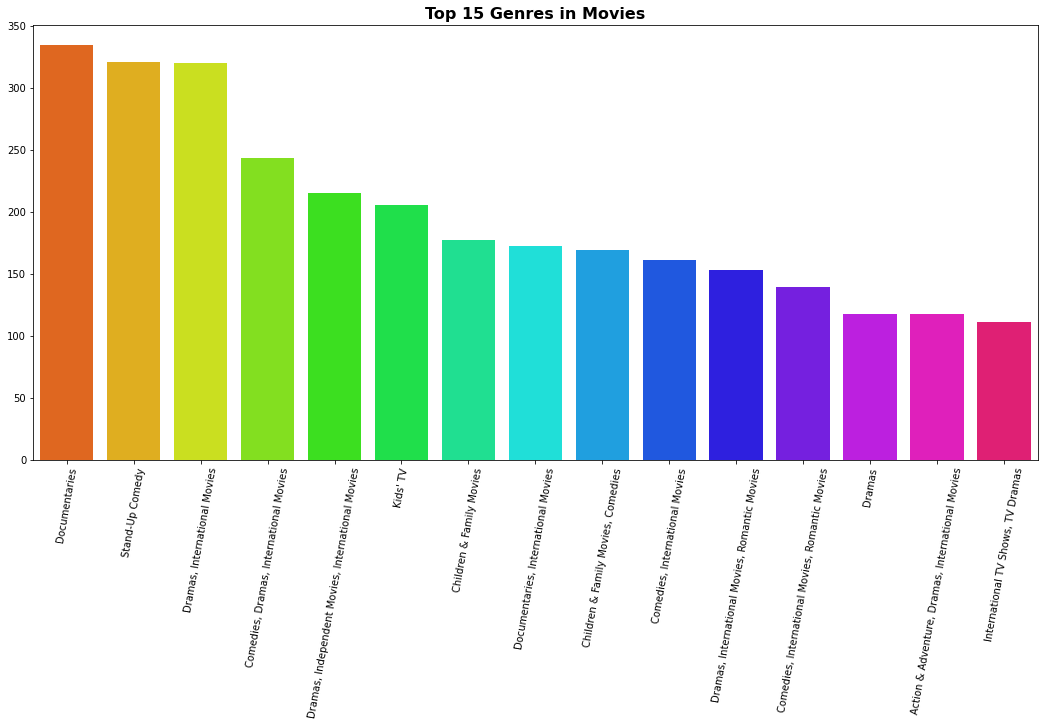

In [37]:
#Top 15 Genre in movies
plt.figure(figsize=(18,8))
sns.barplot(x=netflix['listed_in'].value_counts().head(15).index,
            y=netflix['listed_in'].value_counts().head(15).values, palette='hsv')
plt.xticks(rotation=80)
plt.title('Top 15 Genres in Movies', size='16', fontweight='bold')
plt.show()

From the graph, we know that Documentaries take the first place, followed by Stand-up Comedy and Dramas,International Movies.

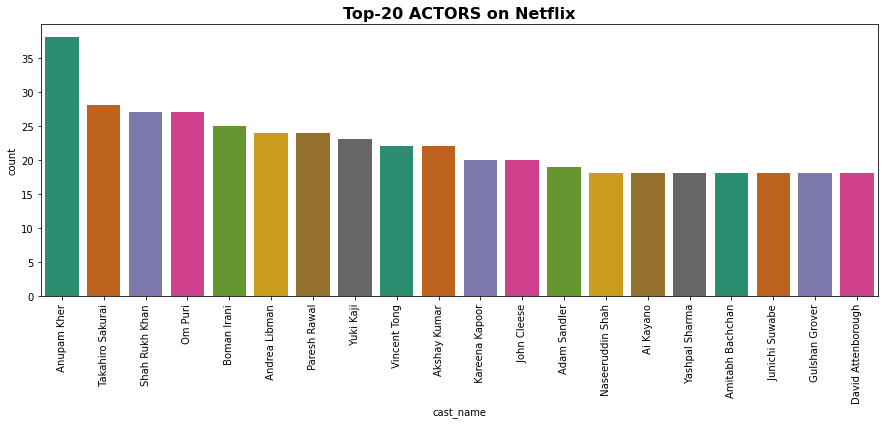

In [38]:
# Top 20 actors on netflix(Based on this data set)
cast_count = []
for i in netflix['cast_name']: cast_count += i
cast_dict = dict((i, cast_count.count(i)) for i in cast_count)
df_cast_count = pd.DataFrame(cast_dict.values(),cast_dict.keys()).reset_index().sort_values(0,ascending=False).rename(
    columns = {'index' : 'cast_name', 0 : 'count'}).iloc[1:21]
plt.figure(figsize=(15,5))
sns.barplot(x='cast_name',y='count',data=df_cast_count,palette="Dark2")
plt.title("Top-20 ACTORS on Netflix",size='16',fontweight="bold")
plt.xticks(rotation=90)
plt.show()

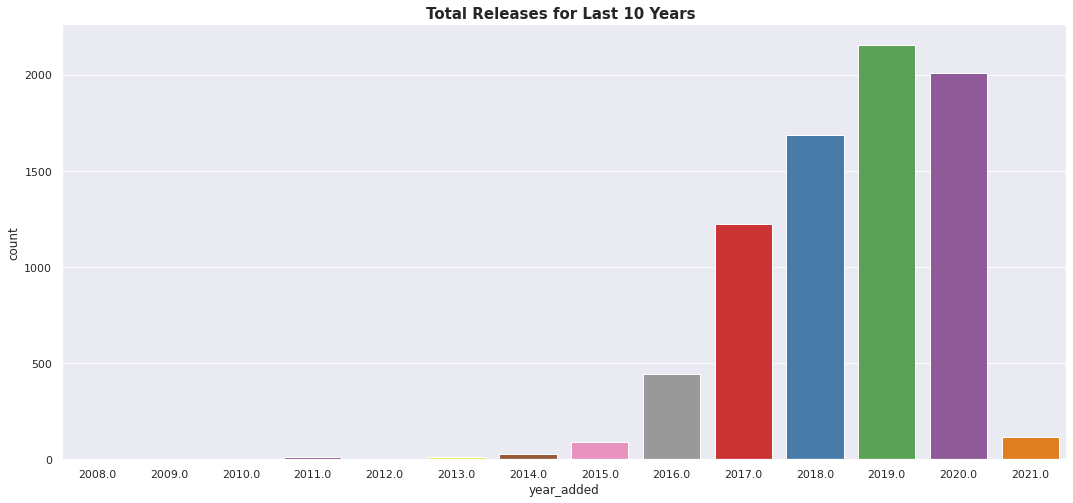

In [39]:
# Total release for last 10 years
sns.set(rc={'figure.figsize':(18,8)})
sns.countplot(x='year_added',data=netflix,palette="Set1")

plt.title('Total Releases for Last 10 Years ',size='15',fontweight="bold")    
plt.show()

#**Data preprocessing for "Description" attributes**

In [40]:
#checking the first row values for the description attribute
netflix['description'][0]

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

In [41]:
#creating a function which gives the length of the description attribute's values
def length(text):
  '''a function which returns the length of text'''
  return len(text)

In [42]:
#creating a new column which gives the length of the description attribute's values
netflix['length_of_description_Before'] = netflix['description'].apply(length)
netflix.head()

,type,title,cast,country,date_added,release_year,rating,listed_in,description,year_added,cast_name,age_rating,length_of_description_Before
0,TV Show,3,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,"[João Miguel, Bianca Comparato, Michel Gomes...",Adults,136
1,Movie,719,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",Adults,148
2,Movie,2359,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0,"[Tedd Chan, Stella Chung, Henley Hii, Lawre...",Adults,149
3,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0,"[Elijah Wood, John C. Reilly, Jennifer Conne...",Teens,145
4,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,Dramas,A brilliant group of students become card-coun...,2020.0,"[Jim Sturgess, Kevin Spacey, Kate Bosworth, ...",Teens,143


###**Removing Punctuation**###

In [43]:
#creating a function called remove_punctuation and using this function to apply on the description data in the dataset
def rem_punctuation(text):
  '''THis is a function for removing punctuation'''
  import string 
  translator = str.maketrans('','', string.punctuation)  
  return text.translate(translator) 

In [44]:
#applying above created function on the description data to remove punctuations
netflix['description'] = netflix['description'].apply(rem_punctuation)
netflix.head()

,type,title,cast,country,date_added,release_year,rating,listed_in,description,year_added,cast_name,age_rating,length_of_description_Before
0,TV Show,3,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,"[João Miguel, Bianca Comparato, Michel Gomes...",Adults,136
1,Movie,719,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",Adults,148
2,Movie,2359,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,"Horror Movies, International Movies",When an army recruit is found dead his fellow ...,2018.0,"[Tedd Chan, Stella Chung, Henley Hii, Lawre...",Adults,149
3,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,"Action & Adventure, Independent Movies, Sci-Fi...",In a postapocalyptic world ragdoll robots hide...,2017.0,"[Elijah Wood, John C. Reilly, Jennifer Conne...",Teens,145
4,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,Dramas,A brilliant group of students become cardcount...,2020.0,"[Jim Sturgess, Kevin Spacey, Kate Bosworth, ...",Teens,143


In [45]:
#Working with stop words 
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
np.array(stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


array({"wasn't", 'd', 'myself', 'needn', "that'll", "haven't", 'yourself', 'with', 'ma', 'hers', 'i', "needn't", 'they', 'who', 'above', 'up', 'all', 'hadn', 'during', 'have', 'while', 'will', 'itself', 'y', 'through', 'same', 'their', 'any', 'about', 'what', 'after', 'doesn', 'only', 'there', 'each', 's', 'other', "you've", 'no', 'should', "isn't", 'his', 'by', 'been', 'of', 'ain', 'was', 'most', 'ourselves', 'over', 'this', 'our', 'mightn', 'then', 'such', 'has', 'be', 'down', 'nor', "won't", 'haven', 'until', "you'd", "shouldn't", 'against', 'or', 'you', 'and', 'my', 'why', 'them', 'here', 'doing', 'again', 'were', 'once', 'not', 'didn', 'isn', 'it', "mustn't", 're', 'wasn', 'because', 'on', 'between', "hasn't", 'me', 'he', 'so', 'off', 'mustn', 'how', "you'll", 'll', "wouldn't", 've', 'that', 'under', 'a', 'from', "didn't", 'is', "you're", "doesn't", 'won', 'shan', 'an', 'these', 'further', 'both', 'himself', 'more', 'in', 'below', 'than', 'now', 'out', 'few', 'can', 'before', 'som

In [46]:
#print number of stopwords
print('The total numbers of stopwords is', len(stop_words))

The total numbers of stopwords is 179


In [47]:
#creating a function for removing the stopwords in the DESCRIPTION attribute
def stopwords(text):
  '''This is a function for removing the stopwords'''
  text = [word.lower() for word in text.split() if word.lower() not in stop_words]
  return " ".join(text) 

In [48]:
#applying above function on the DESCRIPTION attribute
netflix['description'] = netflix['description'].apply(stopwords)

In [49]:
#checking the description attribute after removing stop words
netflix['description'].head()

0    future elite inhabit island paradise far crowd...
1    devastating earthquake hits mexico city trappe...
2    army recruit found dead fellow soldiers forced...
3    postapocalyptic world ragdoll robots hide fear...
4    brilliant group students become cardcounting e...
Name: description, dtype: object

In [50]:
#Lets creating a function of stemming function using SnowballStemmer module
stemmer = SnowballStemmer("english")
def stemming_func(text):
  '''This is a function which stems each word in the given text'''
  text = [stemmer.stem(word) for word in text.split()]
  return " ".join(text)

In [51]:
#applying above function on the DESCRIPTION attribute
netflix['description'] = netflix['description'].apply(stemming_func)
netflix['description'].head()

0    futur elit inhabit island paradis far crowd sl...
1    devast earthquak hit mexico citi trap survivor...
2    armi recruit found dead fellow soldier forc co...
3    postapocalypt world ragdol robot hide fear dan...
4    brilliant group student becom cardcount expert...
Name: description, dtype: object

In [52]:
# creating a new column which gives the length of the description attribute's values 
netflix['length_of_description_after'] = netflix['description'].apply(length)
netflix.head()

,type,title,cast,country,date_added,release_year,rating,listed_in,description,year_added,cast_name,age_rating,length_of_description_Before,length_of_description_after
0,TV Show,3,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,"International TV Shows, TV Dramas, TV Sci-Fi &...",futur elit inhabit island paradis far crowd sl...,2020.0,"[João Miguel, Bianca Comparato, Michel Gomes...",Adults,136,82
1,Movie,719,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,"Dramas, International Movies",devast earthquak hit mexico citi trap survivor...,2016.0,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",Adults,148,88
2,Movie,2359,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,"Horror Movies, International Movies",armi recruit found dead fellow soldier forc co...,2018.0,"[Tedd Chan, Stella Chung, Henley Hii, Lawre...",Adults,149,102
3,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,"Action & Adventure, Independent Movies, Sci-Fi...",postapocalypt world ragdol robot hide fear dan...,2017.0,"[Elijah Wood, John C. Reilly, Jennifer Conne...",Teens,145,89
4,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,Dramas,brilliant group student becom cardcount expert...,2020.0,"[Jim Sturgess, Kevin Spacey, Kate Bosworth, ...",Teens,143,99


##**For 'listed_in' attribute**

In [53]:
#checking the length of the text values of listed_in attribute before removing punctuations, stopwords or do stemming.
netflix['length_ of_listed_in_before'] = netflix['listed_in'].apply(length)

In [54]:
#applying stopwords function on the listed_in attribute
netflix['listed_in'] = netflix['listed_in'].apply(stopwords)

In [55]:
#applying removing punctuation function on the listed_in attribute
netflix['listed_in'] = netflix['listed_in'].apply(rem_punctuation)

In [56]:
#applying stemming function on the listed_in attribute
netflix['listed_in'] = netflix['listed_in'].apply(stemming_func)

In [57]:
#checking the length of the text values of listed_in attribute after removing punctuations, stopwords or do stemming.
netflix['length_ of_listed_in_after'] = netflix['listed_in'].apply(length)

In [58]:
netflix.head()

,type,title,cast,country,date_added,release_year,rating,listed_in,description,year_added,cast_name,age_rating,length_of_description_Before,length_of_description_after,length_ of_listed_in_before,length_ of_listed_in_after
0,TV Show,3,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,intern tv show tv drama tv scifi fantasi,futur elit inhabit island paradis far crowd sl...,2020.0,"[João Miguel, Bianca Comparato, Michel Gomes...",Adults,136,82,54,40
1,Movie,719,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,drama intern movi,devast earthquak hit mexico citi trap survivor...,2016.0,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",Adults,148,88,28,17
2,Movie,2359,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,horror movi intern movi,armi recruit found dead fellow soldier forc co...,2018.0,"[Tedd Chan, Stella Chung, Henley Hii, Lawre...",Adults,149,102,35,23
3,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,action adventur independ movi scifi fantasi,postapocalypt world ragdol robot hide fear dan...,2017.0,"[Elijah Wood, John C. Reilly, Jennifer Conne...",Teens,145,89,56,43
4,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,drama,brilliant group student becom cardcount expert...,2020.0,"[Jim Sturgess, Kevin Spacey, Kate Bosworth, ...",Teens,143,99,6,5


###**Observation:**
####**We can see the length of the text values for DESCRIPTION and LISTED IN in the dataframe both before and after stemming, eliminating stop words, and deleting punctuation. The text length values before and after stemming, deleting stop words, and removing punctuation show numerous differences..**

#**Clustering Methods and Models**

#**Silhouette Score Method**

In [59]:
#Importing required modules from sklearn library
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
X_features_rec_mon = netflix[['length_of_description_after','length_ of_listed_in_after']]
scaler_rec_mon = preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]  
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.33650097831970527
For n_clusters = 3, silhouette score is 0.34842749246617466
For n_clusters = 4, silhouette score is 0.31816017497554705
For n_clusters = 5, silhouette score is 0.3079290143287653
For n_clusters = 6, silhouette score is 0.32890628288741874
For n_clusters = 7, silhouette score is 0.32366435372987523
For n_clusters = 8, silhouette score is 0.3210516112268902
For n_clusters = 9, silhouette score is 0.32294908861876903
For n_clusters = 10, silhouette score is 0.32225067506509175
For n_clusters = 11, silhouette score is 0.32805689807678007
For n_clusters = 12, silhouette score is 0.32928604408069184
For n_clusters = 13, silhouette score is 0.32399115201319356
For n_clusters = 14, silhouette score is 0.3269203819377674
For n_clusters = 15, silhouette score is 0.33039927767150046


In [60]:
#to visualize the silhouette score oupput wrt clusters, we used SilhouetteVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score, silhouette_samples

def silhouette_score_analysis(n):

  for n_clusters in range(2,n):
      kmean_clusters = KMeans (n_clusters=n_clusters, random_state=5)
      predictions = kmean_clusters.fit_predict(X)
      centers = kmean_clusters.cluster_centers_

      score = silhouette_score(X, preds, metric='euclidean')
      print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

      visualizer = SilhouetteVisualizer(kmean_clusters)

      visualizer.fit(X) #Fit the training data to the visualizer
      visualizer.poof() #Draw/show/poof the data

For n_clusters = 2, silhouette score is 0.33039927767150046


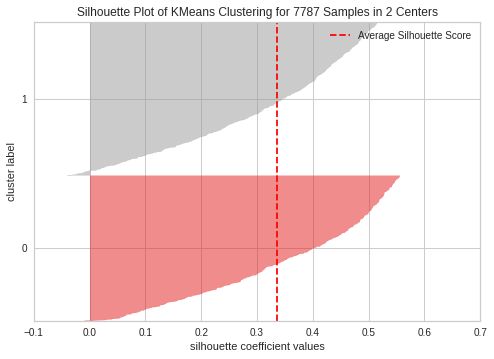

For n_clusters = 3, silhouette score is 0.33039927767150046


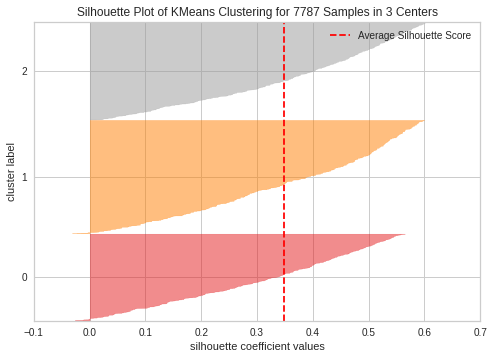

For n_clusters = 4, silhouette score is 0.33039927767150046


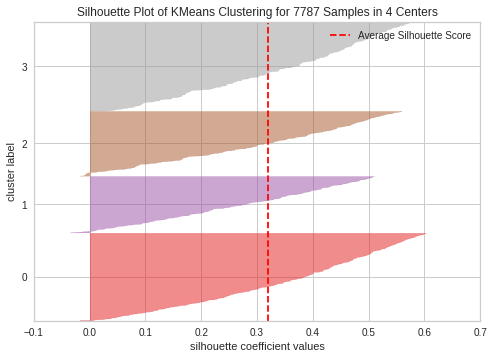

For n_clusters = 5, silhouette score is 0.33039927767150046


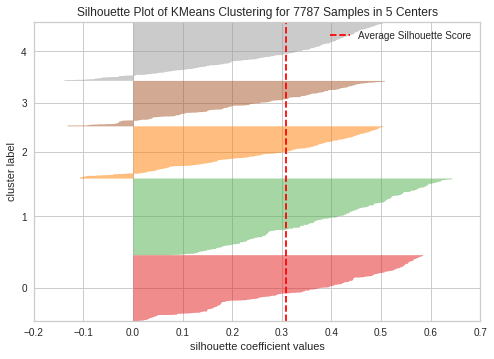

For n_clusters = 6, silhouette score is 0.33039927767150046


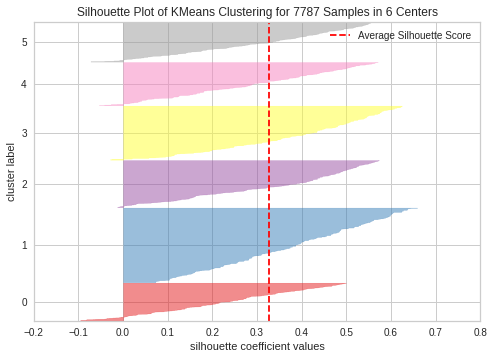

For n_clusters = 7, silhouette score is 0.33039927767150046


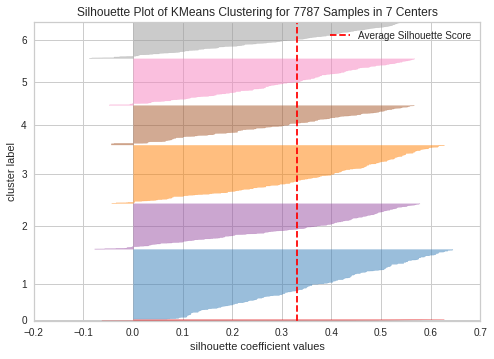

For n_clusters = 8, silhouette score is 0.33039927767150046


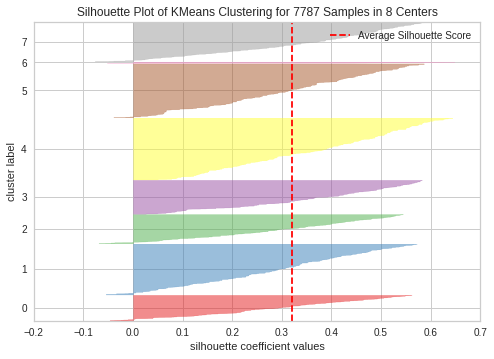

For n_clusters = 9, silhouette score is 0.33039927767150046


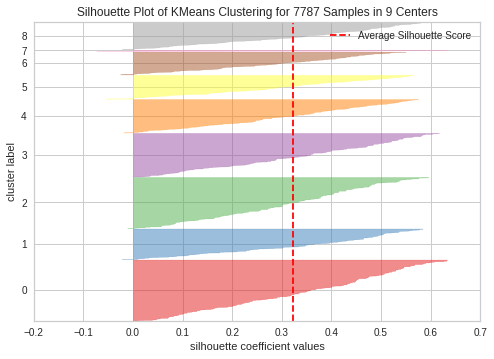

For n_clusters = 10, silhouette score is 0.33039927767150046


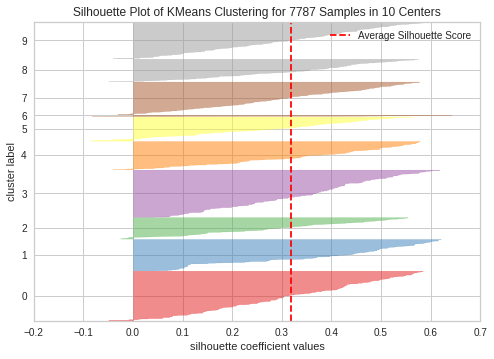

For n_clusters = 11, silhouette score is 0.33039927767150046


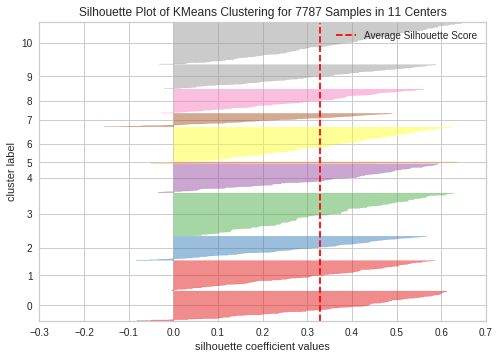

For n_clusters = 12, silhouette score is 0.33039927767150046


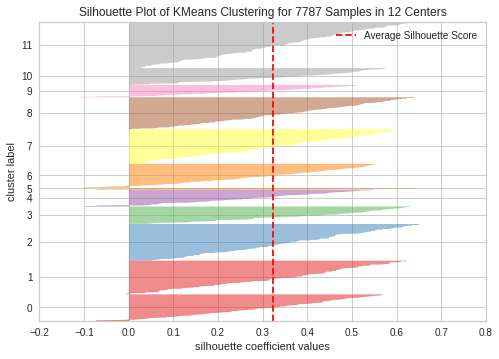

For n_clusters = 13, silhouette score is 0.33039927767150046


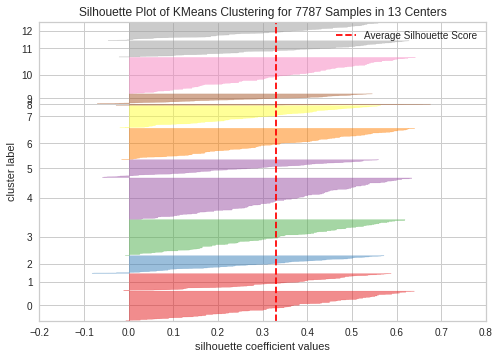

For n_clusters = 14, silhouette score is 0.33039927767150046


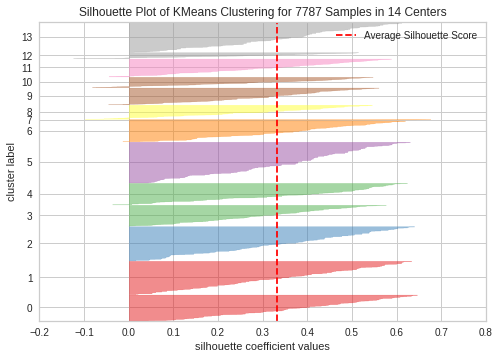

For n_clusters = 15, silhouette score is 0.33039927767150046


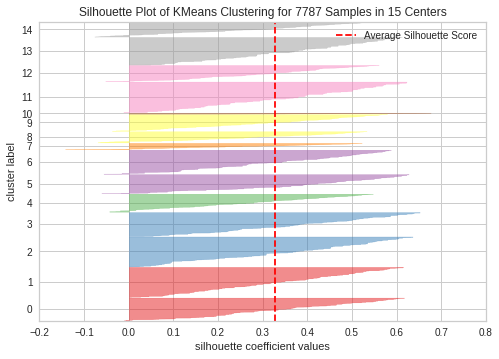

For n_clusters = 16, silhouette score is 0.33039927767150046


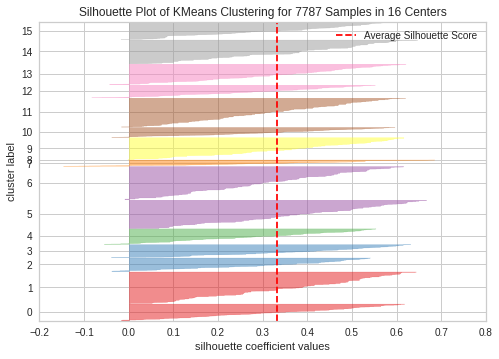

For n_clusters = 17, silhouette score is 0.33039927767150046


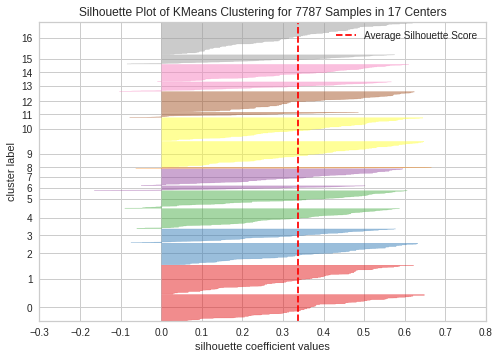

For n_clusters = 18, silhouette score is 0.33039927767150046


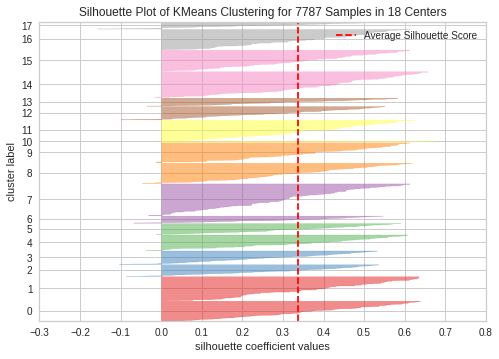

For n_clusters = 19, silhouette score is 0.33039927767150046


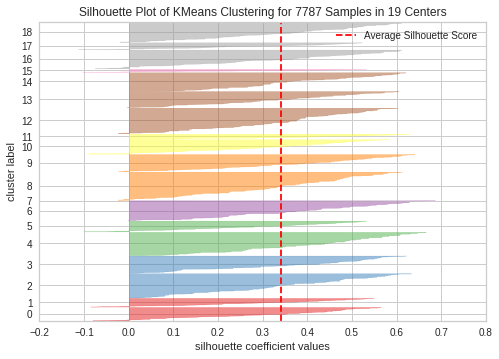

For n_clusters = 20, silhouette score is 0.33039927767150046


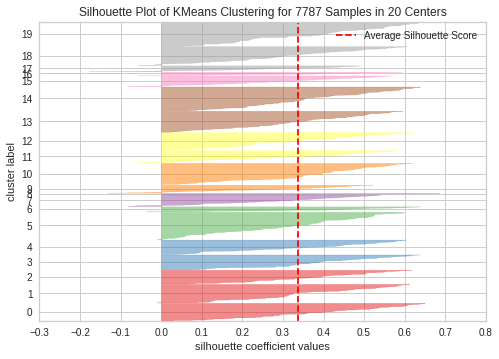

For n_clusters = 21, silhouette score is 0.33039927767150046


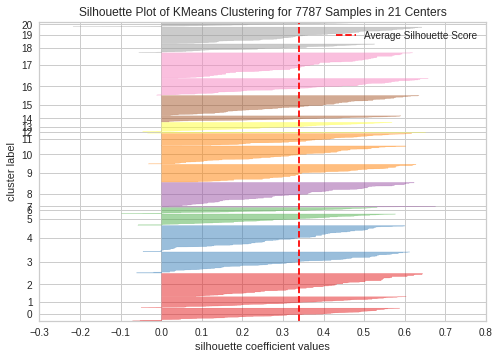

In [61]:
silhouette_score_analysis(22)

#**K-Means Clustering**

####**Applying Elbow Method**

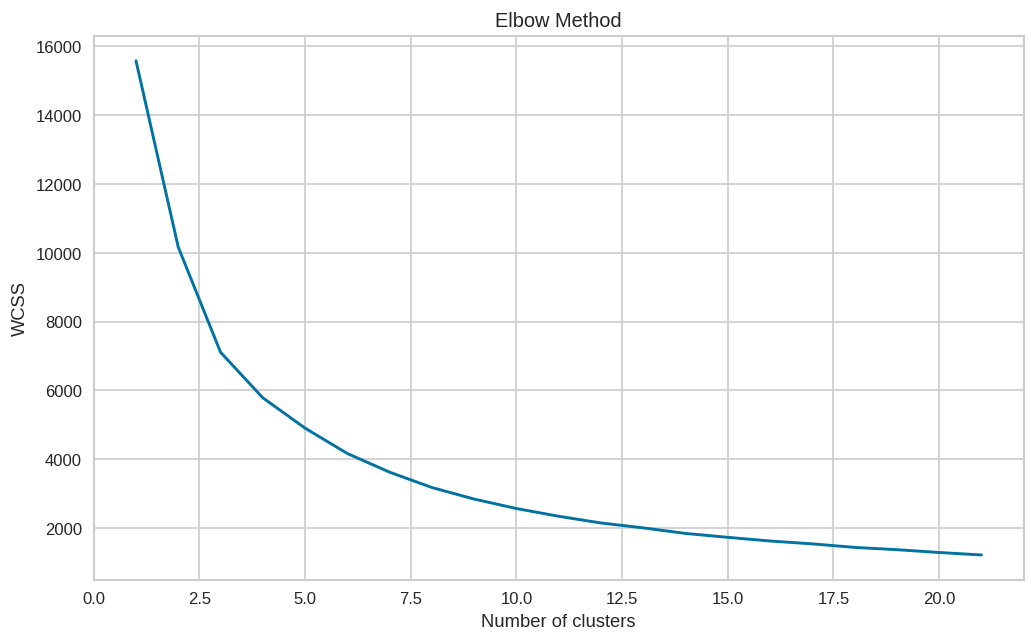

In [62]:
#Interpretation of a line plot with an elbow shape
plt.figure(figsize=(10,6), dpi = 120)
wcss = []
for i in range(1,22):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,22), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [63]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

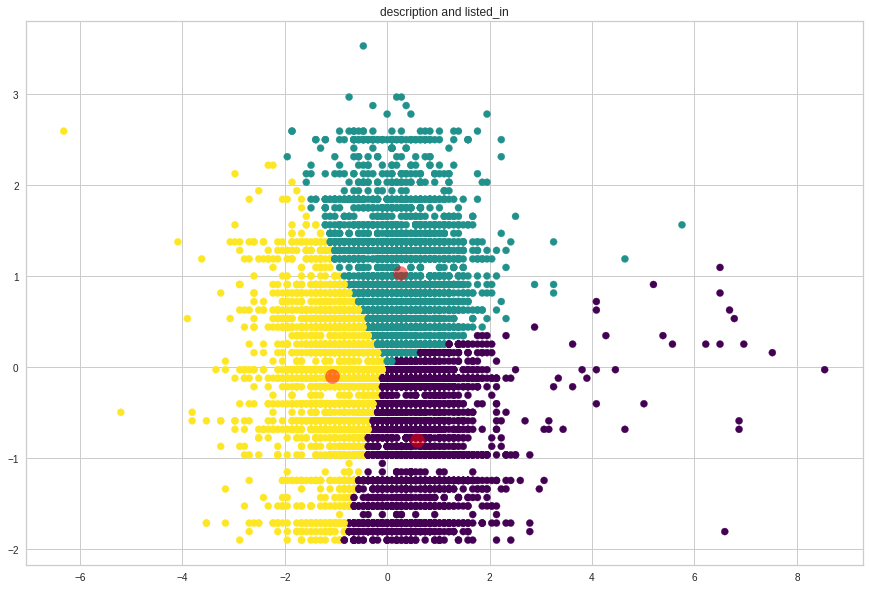

In [64]:
#plotting a scatterplot
plt.figure(figsize=(15,10))
plt.title('description and listed_in')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap ='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

#**Agglomerative hierarchical Clustering**

In [65]:
from scipy.spatial.distance import euclidean
#Fitting hierarchical clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

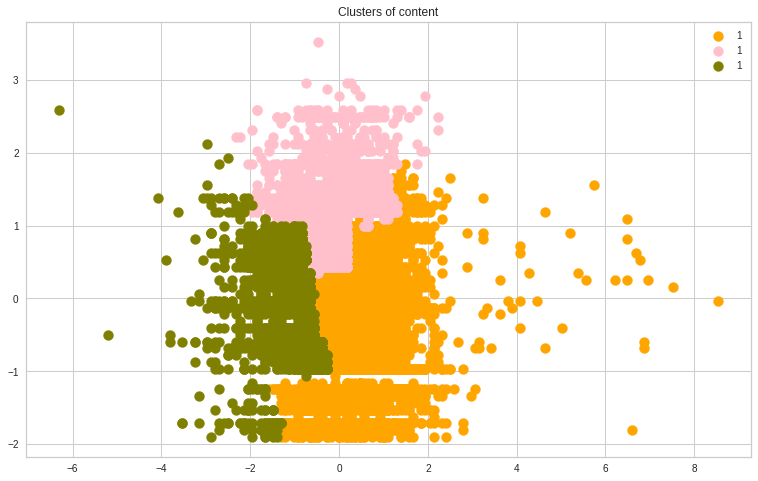

In [66]:
# Visualizing the clusters in three dimensions
plt.figure(figsize=(13,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'orange', label = '1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'pink', label = '1')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'olive', label = '1')
plt.title('Clusters of content')

plt.legend()
plt.show()

#**Hierarchical clustering**

###**DENDROGRAM**

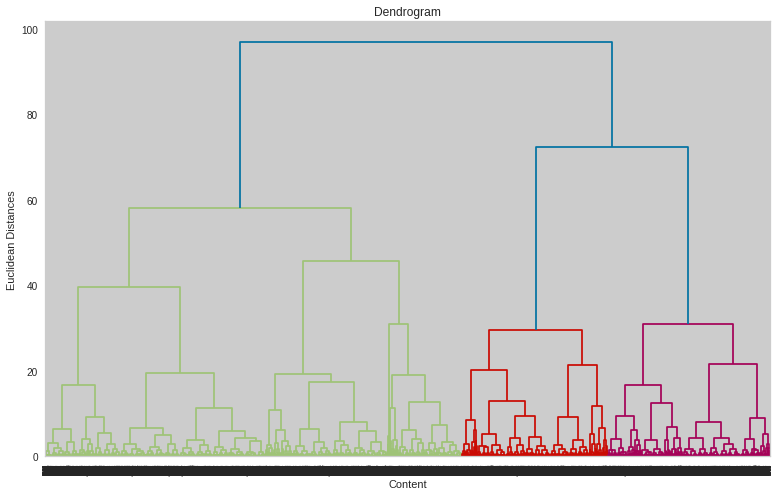

In [67]:
#Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Content')
plt.ylabel('Euclidean Distances')
plt.show() 

###**Observation:**
####**By applying different clustering algorithm to our dataset, we get the optimal number of cluster is equal to 3**

#**Let's see the recommendation of Netflix data**

In [68]:
# lets see the club the different attributes values in one column 
clustering_df = netflix[['title']]
clustering_df['cluster_data'] = (netflix['description'] + ' ' + netflix['listed_in'] + ' ' + netflix['cast'] + ' ' + netflix['country'] + ' ' + netflix['rating']).astype(str)
clustering_df.set_index('title', inplace = True)
clustering_df.head()


,cluster_data
title,
3,futur elit inhabit island paradis far crowd sl...
719,devast earthquak hit mexico citi trap survivor...
2359,armi recruit found dead fellow soldier forc co...
9,postapocalypt world ragdol robot hide fear dan...
21,brilliant group student becom cardcount expert...


In [69]:
bagging_of_words = clustering_df.cluster_data
bagging_of_words

title
3                          futur elit inhabit island paradis far crowd sl...
719                        devast earthquak hit mexico citi trap survivor...
2359                       armi recruit found dead fellow soldier forc co...
9                          postapocalypt world ragdol robot hide fear dan...
21                         brilliant group student becom cardcount expert...
                                                 ...                        
zozo                       lebanon civil war depriv zozo famili hes left ...
zubaan                     scrappi poor boy worm way tycoon dysfunct fami...
zulu man japan             documentari south african rapper nasti c hit s...
zumbos desserts            dessert wizard adriano zumbo look next “willi ...
zz little ol band texas    documentari delv mystiqu behind bluesrock trio...
Name: cluster_data, Length: 7787, dtype: object

In [70]:
#Converting a collection of texts to a matrix of token counts using CountVectorizer module
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
t_vectorizer = TfidfVectorizer()
count_matrix = t_vectorizer.fit_transform(bagging_of_words)
cosine_sim = cosine_similarity(count_matrix, count_matrix)
cosine_sim

array([[1.        , 0.037576  , 0.02080098, ..., 0.01035964, 0.01545236,
        0.0080534 ],
       [0.037576  , 1.        , 0.00616669, ..., 0.06256221, 0.005385  ,
        0.00559776],
       [0.02080098, 0.00616669, 1.        , ..., 0.00849786, 0.00216194,
        0.        ],
       ...,
       [0.01035964, 0.06256221, 0.00849786, ..., 1.        , 0.00742067,
        0.23406756],
       [0.01545236, 0.005385  , 0.00216194, ..., 0.00742067, 1.        ,
        0.02984438],
       [0.0080534 , 0.00559776, 0.        , ..., 0.23406756, 0.02984438,
        1.        ]])

In [71]:
indices = pd.Series(clustering_df.index)
indices[:5]

0       3
1     719
2    2359
3       9
4      21
Name: title, dtype: object

In [72]:
# function that takes in movie title as input and returns the top 10 recommended movies
def recommendations(Title, cosine_sim = cosine_sim):
    
    recommended_movies = []
    
    idx = indices[indices == Title].index[0]

    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

 
    top_10_indexes = list(score_series.iloc[1:11].index)
    
    # populating the list with the titles of the best 10 matching movies
    for i in top_10_indexes:
        recommended_movies.append(list(clustering_df.index)[i])
        
    return recommended_movies

In [73]:
#Lets try getting recommendations for Movies.
movie_recommendations = pd.DataFrame(recommendations('new capitalism'), columns=['Recommendations'])
movie_recommendations.head(11)

,Recommendations
0,beginning life
1,catching sun
2,elena
3,edge democracy
4,elles ont toutes une histoire
5,f going
6,bending arc
7,curve
8,water power california heist
9,concrete football


In [74]:
# Lets try getting recommendations for Tv-Shows.
tvshows_recommendations = pd.DataFrame(recommendations('children god'), columns=['Recommendations'])
tvshows_recommendations.head(11)

,Recommendations
0,naga eternal yogi
1,examination conscience
2,makes psychopath
3,born gaza
4,leaf faith
5,unspeakable acts
6,bully
7,women bars
8,surviving r kelly
9,national bird


#**Conclusion**

###1. The data set consists of 7787 rows and 12 columns, and the director and cast features have a significant number of missing values. As a result, we chose to remove the director attribute as well as the duration and show id attributes because they are not necessary for our model.

###2. We offer two categories of content. Movies and TV shows Movies make up 69.05% while TV shows make up 30.95% of the total.

###3. The United States has the highest number of content on Netflix by a huge margin followed by India.

###4. Anupam Kher has appeared in the most Netflix movies of any actor. The most popular genre is documentaries, followed by stand-up comedy.

###5. Most films were released in the years 2018, 2019, and 2020.

###6. The number of releases have significantly increased after 2015 and have dropped in 2021 because of Covid 19.

###7. By examining the content that has been added throughout time, we can see that Netflix has recently placed more of an emphasis on movies than TV shows.

###8. In order to prepare a dataframe for the clustering methods, we performed feature engineering as the second action. This involved deleting specific variables.

###9. The best score obtained using the silhouette score approach for n range clusters on the dataset was 0.348 for clusters = 3, which indicates that the material was adequately explained on its own clusters.

###10. For the clustering algorithm, we utilised "descripton" and "listed_in" attributes

###11. Applied different clustering models Kmeans, hierarchical, Agglomerative clustering on data we got the best cluster arrangments

###12. Speaking of alternative clustering techniques, we found the optimal cluster arrangements using K mean, hierarchical, and agglomerative clustering on the data.
###**Optimal number of cluster = 3**